# DSO106C Portfolio Assignment - Predicting CGPA from Students' Academic Records

## Import/Install Packages

In [ ]:
pip install pyspark

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pyspark.sql import SparkSession
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

## Read in Data

In [104]:
studentMentalHealth = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Entity Academy\Portfolio\DSO106C Extra Portfolio Activities\Student Mental Health\Student Mental Health Revamped.csv")

In [105]:
studentMentalHealth.head()

,Choose your gender,Age,What is your course?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA2,Year2
0,Female,18,Engineering,No,Yes,No,Yes,No,3,1
1,Male,21,Islamic education,No,No,Yes,No,No,3,2
2,Male,19,BIT,No,Yes,Yes,Yes,No,3,1
3,Female,22,Laws,Yes,Yes,No,No,No,3,3
4,Male,23,Mathemathics,No,No,No,No,No,3,4


In [106]:
def gender_recode (series): 
    if series == "Female": 
        return 0
    if series == "Male": 
        return 1
studentMentalHealth['Gender'] = studentMentalHealth['Choose your gender'].apply(gender_recode)

In [107]:
studentMentalHealth.head()
studentMentalHealth.tail()

,Choose your gender,Age,What is your course?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA2,Year2,Gender
95,Female,21,BCS,No,No,Yes,No,No,4,1,0
96,Male,18,Engineering,No,Yes,Yes,No,No,3,2,1
97,Female,19,Nursing,Yes,Yes,No,Yes,No,4,3,0
98,Female,23,Pendidikan Islam,No,No,No,No,No,4,4,0
99,Male,20,Biomedical science,No,No,No,No,No,3,2,1


In [108]:
studentMentalHealth = studentMentalHealth.drop(['Choose your gender'], axis=1)
studentMentalHealth

,Age,What is your course?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA2,Year2,Gender
0,18,Engineering,No,Yes,No,Yes,No,3,1,0
1,21,Islamic education,No,No,Yes,No,No,3,2,1
2,19,BIT,No,Yes,Yes,Yes,No,3,1,1
3,22,Laws,Yes,Yes,No,No,No,3,3,0
4,23,Mathemathics,No,No,No,No,No,3,4,1
...,...,...,...,...,...,...,...,...,...,...
95,21,BCS,No,No,Yes,No,No,4,1,0
96,18,Engineering,No,Yes,Yes,No,No,3,2,1
97,19,Nursing,Yes,Yes,No,Yes,No,4,3,0
98,23,Pendidikan Islam,No,No,No,No,No,4,4,0


In [109]:
studentMentalHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Age                                           100 non-null    int64 
 1   What is your course?                          100 non-null    object
 2   Marital status                                100 non-null    object
 3   Do you have Depression?                       100 non-null    object
 4   Do you have Anxiety?                          100 non-null    object
 5   Do you have Panic attack?                     100 non-null    object
 6   Did you seek any specialist for a treatment?  100 non-null    object
 7   CGPA2                                         100 non-null    int64 
 8   Year2                                         100 non-null    int64 
 9   Gender                                        100 non-null    int64 
dtypes: 

In [110]:
studentMentalHealth.loc[67]

Age                                                 18
What is your course?                            Malcom
Marital status                                      No
Do you have Depression?                            Yes
Do you have Anxiety?                                No
Do you have Panic attack?                           No
Did you seek any specialist for a treatment?        No
CGPA2                                                4
Year2                                                1
Gender                                               0
Name: 67, dtype: object

In [111]:
studentMentalHealth['What is your course?'].value_counts(ascending=False)

BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
psychology                  2
Engine                      2
Pendidikan Islam            2
BENL                        2
Laws                        2
Fiqh fatwa                  1
DIPLOMA TESL                1
CTS                         1
engin                       1
Econs                       1
Islamic Education           1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Biotechnology               1
Communication               1
Fiqh                        1
IT                          1
Koe                         1
Radiography                 1
Diploma Nursing             1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Resources             1
Irkhs     

In [112]:
def course_recode (series): 
    if series == "Nursing":
        return 0
    if series == "Islamic education":
        return 1
    if series == "ALA":
        return 2
    if series == "TAASL":
        return 3
    if series == "Usuluddin":
        return 4
    if series == "KIRKHS":
        return 5
    if series == "Law":
        return 6
    if series == "Business Administration":
        return 7
    if series == "Banking Studies":
        return 8
    if series == "Marine science":
        return 9
    if series == "ENM":
        return 10
    if series == "Accounting":
        return 11
    if series == "KENMS":
        return 12
    if series == "Psychology":
        return 13
    if series == "Irkhs":
        return 14
    if series == "Human Resources":
        return 15
    if series == "Pendidikan islam":
        return 16
    if series == "Mathemathics":
        return 17
    if series == "Kirkhs":
        return 5
    if series == "Benl":
        return 18
    if series == "koe":
        return 19
    if series == "Diploma Nursing":
        return 0
    if series == "Radiography":
        return 20
    if series == "Koe":
        return 19
    if series == "IT":
        return 21
    if series == "Fiqh":
        return 22
    if series == "Communication":
        return 23
    if series == "Biotechnology":
        return 24
    if series == "Human Sciences":
        return 25
    if series == "Kop":
        return 26
    if series == "Malcom":
        return 27
    if series == "MHSC":
        return 28
    if series == "Islamic Education":
        return 1
    if series == "Econs":
        return 29
    if series == "engin":
        return 30
    if series == "CTS":
        return 31
    if series == "DIPLOMA TESL":
        return 32
    if series == "Fiqh fatwa":
        return 22
    if series == "Laws":
        return 33
    if series == "BENL":
        return 18
    if series == "Pendidikan Islam":
        return 34
    if series == "Engine":
        return 30
    if series == "psychology":
        return 13
    if series == "KOE":
        return 19
    if series == "Biomedical science":
        return 35
    if series == "BIT":
        return 36
    if series == "Engineering":
        return 30
    if series == "BCS":
        return 37
studentMentalHealth['Course'] = studentMentalHealth['What is your course?'].apply(course_recode)

In [113]:
studentMentalHealth = studentMentalHealth.drop(['What is your course?'], axis=1)
studentMentalHealth

,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA2,Year2,Gender,Course
0,18,No,Yes,No,Yes,No,3,1,0,30
1,21,No,No,Yes,No,No,3,2,1,1
2,19,No,Yes,Yes,Yes,No,3,1,1,36
3,22,Yes,Yes,No,No,No,3,3,0,33
4,23,No,No,No,No,No,3,4,1,17
...,...,...,...,...,...,...,...,...,...,...
95,21,No,No,Yes,No,No,4,1,0,37
96,18,No,Yes,Yes,No,No,3,2,1,30
97,19,Yes,Yes,No,Yes,No,4,3,0,0
98,23,No,No,No,No,No,4,4,0,34


In [114]:
studentMentalHealth.isnull().sum()

Age                                             0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
CGPA2                                           0
Year2                                           0
Gender                                          0
Course                                          0
dtype: int64

In [115]:
studentMentalHealth.isna()

,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA2,Year2,Gender,Course
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False


In [116]:
# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(studentMentalHealth)

    Age Marital status Do you have Depression? Do you have Anxiety?  \
0    18             No                     Yes                   No   
1    21             No                      No                  Yes   
2    19             No                     Yes                  Yes   
3    22            Yes                     Yes                   No   
4    23             No                      No                   No   
5    19             No                      No                   No   
6    23            Yes                     Yes                   No   
7    18             No                      No                  Yes   
8    19             No                      No                   No   
9    18             No                      No                  Yes   
10   20             No                      No                   No   
11   24            Yes                     Yes                   No   
12   18             No                     Yes                   No   
13   1

In [117]:
studentMentalHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Age                                           100 non-null    int64 
 1   Marital status                                100 non-null    object
 2   Do you have Depression?                       100 non-null    object
 3   Do you have Anxiety?                          100 non-null    object
 4   Do you have Panic attack?                     100 non-null    object
 5   Did you seek any specialist for a treatment?  100 non-null    object
 6   CGPA2                                         100 non-null    int64 
 7   Year2                                         100 non-null    int64 
 8   Gender                                        100 non-null    int64 
 9   Course                                        100 non-null    int64 
dtypes: 

In [118]:
def marital_recode (series): 
    if series == "No": 
        return 0
    if series == "Yes": 
        return 1
studentMentalHealth['Marital Status'] = studentMentalHealth['Marital status'].apply(marital_recode)

In [119]:
def depression_recode (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1
studentMentalHealth['Depression'] = studentMentalHealth['Do you have Depression?'].apply(depression_recode)

In [120]:
def anxiety_recode (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1
studentMentalHealth['Anxiety'] = studentMentalHealth['Do you have Anxiety?'].apply(anxiety_recode)

In [121]:
def panic_recode (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1
studentMentalHealth['Panic Attack'] = studentMentalHealth['Do you have Panic attack?'].apply(panic_recode)

In [122]:
def treatment_recode (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1
studentMentalHealth['Treatment Sought?'] = studentMentalHealth['Did you seek any specialist for a treatment?'].apply(treatment_recode)

In [123]:
studentMentalHealth.head()

,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA2,Year2,Gender,Course,Marital Status,Depression,Anxiety,Panic Attack,Treatment Sought?
0,18,No,Yes,No,Yes,No,3,1,0,30,0,1,0,1,0
1,21,No,No,Yes,No,No,3,2,1,1,0,0,1,0,0
2,19,No,Yes,Yes,Yes,No,3,1,1,36,0,1,1,1,0
3,22,Yes,Yes,No,No,No,3,3,0,33,1,1,0,0,0
4,23,No,No,No,No,No,3,4,1,17,0,0,0,0,0


In [124]:
studentMentalHealth = studentMentalHealth.drop(['Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?'], axis=1)
studentMentalHealth

,Age,CGPA2,Year2,Gender,Course,Marital Status,Depression,Anxiety,Panic Attack,Treatment Sought?
0,18,3,1,0,30,0,1,0,1,0
1,21,3,2,1,1,0,0,1,0,0
2,19,3,1,1,36,0,1,1,1,0
3,22,3,3,0,33,1,1,0,0,0
4,23,3,4,1,17,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,21,4,1,0,37,0,0,1,0,0
96,18,3,2,1,30,0,1,1,0,0
97,19,4,3,0,0,1,1,0,1,0
98,23,4,4,0,34,0,0,0,0,0


In [125]:
studentMentalHealth.rename(columns = {'CGPA2':'CGPA', 'Year2':'Current Year in College'}, inplace = True)
   
# After renaming the columns
print(studentMentalHealth.columns)

Index(['Age', 'CGPA', 'Current Year in College', 'Gender', 'Course',
       'Marital Status', 'Depression', 'Anxiety', 'Panic Attack',
       'Treatment Sought?'],
      dtype='object')


In [126]:
studentMentalHealth.head()

,Age,CGPA,Current Year in College,Gender,Course,Marital Status,Depression,Anxiety,Panic Attack,Treatment Sought?
0,18,3,1,0,30,0,1,0,1,0
1,21,3,2,1,1,0,0,1,0,0
2,19,3,1,1,36,0,1,1,1,0
3,22,3,3,0,33,1,1,0,0,0
4,23,3,4,1,17,0,0,0,0,0


# Lesson 1
With the dataset and variables you chose for the Modeling – Lesson 4 dataset, perform
linear regression with Scikit-Learn (sklearn) and cross validation

In [127]:
x = studentMentalHealth[['Gender', 'Course', 'Depression', 'Anxiety', 'Current Year in College']]
y = studentMentalHealth['CGPA']

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.4, random_state=101)

In [129]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60, 5) (60,)
(40, 5) (40,)


In [130]:
# Creating the Linear Regression Model

In [131]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [132]:
predictions = lm.predict(x_test)
predictions

array([3.07154755, 3.44801097, 2.83316191, 2.94171247, 3.11397229,
       3.08490807, 2.89276894, 3.12003297, 2.92229127, 3.11273313,
       3.11521146, 3.0598843 , 3.72321878, 3.72354174, 3.57878402,
       2.90184959, 3.74016165, 2.8990483 , 2.9594364 , 3.12407342,
       3.10634949, 2.74529347, 2.8990483 , 3.11847085, 3.35936147,
       2.88490672, 3.11273313, 3.08008656, 3.53231882, 2.92835195,
       3.53231882, 3.689656  , 3.10432927, 3.10432927, 3.11847085,
       2.96549708, 3.3500414 , 3.10432927, 3.70659887, 3.06066536])

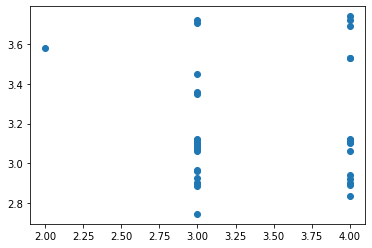

In [133]:
scatterpred = plt.scatter(y_test, predictions)

In [34]:
print("Score:", lm.score(x_test, y_test))

Score: -0.5184898755926424


In [35]:
# From what we can tell by both the lack of linearity in the scatter plot and the negative accuracy score, these predictions aren't at all accurate.

In [36]:
metrics.mean_absolute_error(y_test, predictions)

0.5236347943447136

In [37]:
# The avg amount of error between the prediction and the real data is 0.524, which is close to zero, making it extremely good.

In [38]:
# Getting the Mean Squared Error (MSE)

In [39]:
metrics.mean_squared_error(y_test, predictions)

0.45175073798881105

In [40]:
# This is the square of the absolute error from above. This one would be
# used because it takes into account large amounts of error, which often
# happens in the real world.

In [41]:
# Getting Root Mean Squared Error (RMSE)

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.6721240495539578

In [43]:
# The closer to zero the RMSE is the better the model fits. Here indicates that the model fits quite well.

In [44]:
# Creating the Folds

In [45]:
kfold = KFold(n_splits = 3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [ 0  1  3  4  5  6  7  8  9 11 12 13 14 15 16 18 20 21 22 23 24 25 26 28
 29 30 34 37 40 41 42 43 45 47 48 49 50 53 55 57 58 59 60 61 63 64 66 68
 70 71 72 74 75 76 77 79 83 85 86 87 88 89 90 91 96 98], test: [ 2 10 17 19 27 31 32 33 35 36 38 39 44 46 51 52 54 56 62 65 67 69 73 78
 80 81 82 84 92 93 94 95 97 99]
train: [ 0  1  2  5  6  7  9 10 11 12 13 14 16 17 18 19 20 22 25 27 28 29 31 32
 33 35 36 37 38 39 44 46 50 51 52 54 56 57 60 61 62 63 64 65 67 68 69 71
 72 73 75 76 78 79 80 81 82 84 85 90 92 93 94 95 96 97 99], test: [ 3  4  8 15 21 23 24 26 30 34 40 41 42 43 45 47 48 49 53 55 58 59 66 70
 74 77 83 86 87 88 89 91 98]
train: [ 2  3  4  8 10 15 17 19 21 23 24 26 27 30 31 32 33 34 35 36 38 39 40 41
 42 43 44 45 46 47 48 49 51 52 53 54 55 56 58 59 62 65 66 67 69 70 73 74
 77 78 80 81 82 83 84 86 87 88 89 91 92 93 94 95 97 98 99], test: [ 0  1  5  6  7  9 11 12 13 14 16 18 20 22 25 28 29 37 50 57 60 61 63 64
 68 71 72 75 76 79 85 90 96]


In [46]:
# Running something cross-validated

In [47]:
print(cross_val_score(lm, x,y, cv=3))

[-0.43051938 -0.29802494 -0.18611111]


In [48]:
# Looks like the first trained model was accurate -43.05% of the time,
# while the second model was accurate -29.80% of the time, and the third
# model was accurate -18.61% of the time.

# Lesson 2
Out of the 5 datasets that you chose during DSO104, choose a dataset with one
categorical variable that you think would be valuable to predict. Also, this dataset must
have at least 4 other variables that you think may influence your dependent variable. If
any of these 4 or more independent variables are of type string, you will have to do some
re-coding. Complete a KNN classification model, confusion matrix, and assess its accuracy
of model

## From the last dataset for Student Mental Health, we will be choosing to predict whether or not treatment was sought for college students on these four variables: whether or not they were male or female, married, and whether they suffered from anxiety, depression or panic attacks.

In [49]:
# PERFORMING k_NEAREST NIEGHBORS IN PYTHON

In [50]:
#Scaling Your Data

In [51]:
scaler = StandardScaler()
scaler.fit(studentMentalHealth.drop('Treatment Sought?', axis=1))
scaledVariables = scaler.transform(studentMentalHealth.drop('Treatment Sought?', axis =1))
smhScaled = pd.DataFrame(scaledVariables, columns=studentMentalHealth.columns[:-1])

In [52]:
studentMentalHealth

,Age,CGPA,Current Year in College,Gender,Course,Marital Status,Depression,Anxiety,Panic Attack,Treatment Sought?
0,18,3,1,0,30,0,1,0,1,0
1,21,3,2,1,1,0,0,1,0,0
2,19,3,1,1,36,0,1,1,1,0
3,22,3,3,0,33,1,1,0,0,0
4,23,3,4,1,17,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,21,4,1,0,37,0,0,1,0,0
96,18,3,2,1,30,0,1,1,0,0
97,19,4,3,0,0,1,1,0,1,0
98,23,4,4,0,34,0,0,0,0,0


In [53]:
smhScaled

,Age,CGPA,Current Year in College,Gender,Course,Marital Status,Depression,Anxiety,Panic Attack
0,-1.018614,-0.352387,-0.990152,-0.577350,0.402529,-0.436436,1.362770,-0.717741,1.424887
1,0.189229,-0.352387,0.020207,1.732051,-2.174367,-0.436436,-0.733799,1.393261,-0.701810
2,-0.616000,-0.352387,-0.990152,1.732051,0.935680,-0.436436,1.362770,1.393261,1.424887
3,0.591843,-0.352387,1.030566,-0.577350,0.669104,2.291288,1.362770,-0.717741,-0.701810
4,0.994457,-0.352387,2.040925,1.732051,-0.752631,-0.436436,-0.733799,-0.717741,-0.701810
...,...,...,...,...,...,...,...,...,...
95,0.189229,0.784344,-0.990152,-0.577350,1.024538,-0.436436,-0.733799,1.393261,-0.701810
96,-1.018614,-0.352387,0.020207,1.732051,0.402529,-0.436436,1.362770,1.393261,-0.701810
97,-0.616000,0.784344,1.030566,-0.577350,-2.263226,2.291288,1.362770,-0.717741,1.424887
98,0.994457,0.784344,2.040925,-0.577350,0.757963,-0.436436,-0.733799,-0.717741,-0.701810


In [54]:
# Creating x and y Datasets

In [55]:
x = smhScaled
y = studentMentalHealth['Treatment Sought?']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [57]:
# Take a trial run and perform KNN analysis

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [59]:
# Interpret KNN Predictions

In [60]:
confusion_matrix(y_test, pred)

array([[29,  0],
       [ 1,  0]], dtype=int64)

In [61]:
# This shows how the predicted data lines up with 
# reality. There are two different outcomes as to
# whether students sought treatment or not. It
# appears from a trial run of 0.3 test size that
# 29 individuals did not seek treatment from
# specialists whereas perhaps only 1 out of the
# entire test size sought treatment.

In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.00      0.00      0.00         1

    accuracy                           0.97        30
   macro avg       0.48      0.50      0.49        30
weighted avg       0.93      0.97      0.95        30



C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# The KNN algorithm was 97% correct about pre-
# dicting how many college students did not
# seek treatment, and was 0% accurate in predicting the
# number of college students that did seek treatment.
#You can also look at the weighted avg row for precision
# which gives an overall value of 93%.

In [64]:
# To get the accuracy level a bit higher, try
# using the Elbow Method, which is a way to plot
# error to see which number of neighbors is best.

In [65]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

In [66]:
# Plot this choosing your own labels, colors, and
# titles.

Text(0, 0.5, 'Error Rate')

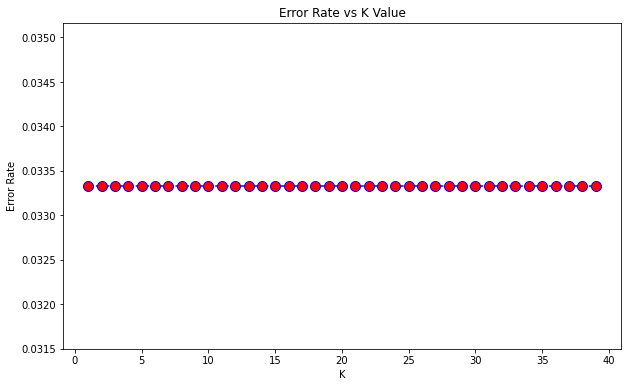

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color ='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
# In this case, all k 
# values that are at a
# stable 0.0334 error rate
# which might as well be
# zero--a strong indication
# of low error.

In [69]:
# Run the final model, by using one of these k
# values in the model:

In [70]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [71]:
print(confusion_matrix(y_test, pred))

[[29  0]
 [ 1  0]]


In [72]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.00      0.00      0.00         1

    accuracy                           0.97        30
   macro avg       0.48      0.50      0.49        30
weighted avg       0.93      0.97      0.95        30



C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# The final model displayed the same results as the test.

# Lesson 3
With the dataset and variables you chose in Machine Learning Lesson 2 Extra Activity, create a Random Forest model with the optimal hyperparameters by performing hyperparameter tuning using RandomSearchCV.

In [74]:
x = studentMentalHealth.drop('Treatment Sought?', axis=1)
y = studentMentalHealth['Treatment Sought?']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [76]:
forest = RandomForestClassifier(n_estimators=800, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=800, random_state=76)

In [77]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[28  1]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.00      0.00      0.00         1

    accuracy                           0.93        30
   macro avg       0.48      0.48      0.48        30
weighted avg       0.93      0.93      0.93        30



## According to the confusion matrix, 28 college students were found to have not sought treatment after predictions were made that they would have. One of these students was predicted to have sought treatment from a specialist.

## This model is 93% accurate, with the number of predictions against college students seeking specialists for treatment at 97% while the prediction for students who actually sought specialists for treatment held an accuracy percentage of  0%.

In [78]:
# Next we will be performing hyperparameter tuning!

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [80]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500, 800]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.9
4 : 0.9666666666666667
5 : 0.9333333333333333
8 : 0.9666666666666667
10 : 0.9666666666666667
20 : 0.9666666666666667
50 : 0.9666666666666667
75 : 0.9666666666666667
100 : 0.9666666666666667
250 : 0.9666666666666667
500 : 0.9666666666666667
800 : 0.9333333333333333


In [81]:
# It appears that n_estimator, 10, holds the highest accuracy score of 96.7%.

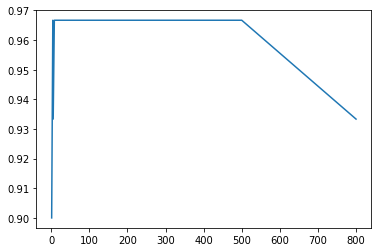

In [82]:
plt.plot(n_estimators_array, results)

In [83]:
max_features = ['auto', None, 'log2'] # Number of features to consider at every split
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None] # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4] # Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [84]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [86]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [91]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10}

In [88]:
# This means that the model with the best accuracy has at least 2 samples per leaf, leaves the max fatures setting on auto, and has a maximum depth of 10 decision points.

In [90]:
forest = RandomForestClassifier(n_estimators = 10, min_samples_leaf=2, max_features="auto", max_depth=10)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=10)

In [93]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[29  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.00      0.00      0.00         1

    accuracy                           0.97        30
   macro avg       0.48      0.50      0.49        30
weighted avg       0.93      0.97      0.95        30



C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Overall accuracy is 93% weighted!

In [94]:
# Feature Importance Calculation

In [96]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

Age                        0.088925
CGPA                       0.030992
Current Year in College    0.079507
Gender                     0.039523
Course                     0.300175
Marital Status             0.087969
Depression                 0.155276
Anxiety                    0.078157
Panic Attack               0.139477
dtype: float64

In [97]:
# The bigger, the better for feature importance. To sort them in order of feature importance:

In [98]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

Course                     0.300175
Depression                 0.155276
Panic Attack               0.139477
Age                        0.088925
Marital Status             0.087969
Current Year in College    0.079507
Anxiety                    0.078157
Gender                     0.039523
CGPA                       0.030992
dtype: float64


<AxesSubplot:>

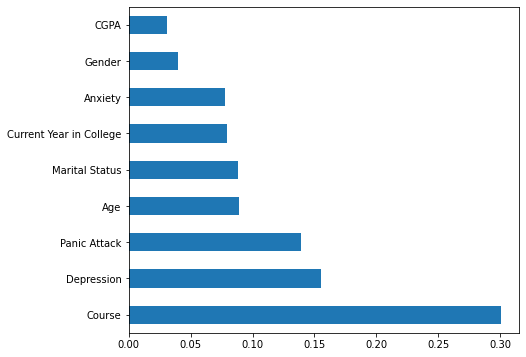

In [99]:
feature_importances.plot(kind='barh', figsize=(7,6))